In [1]:
using LinearAlgebra
using Statistics
using Random
using Distributions

In [2]:
# Współczynniki
alpha_11 = 0.85
alpha_12 = 0.1
alpha_21 = 0.5
alpha_22 = 0.5
alpha_23 = 0.0
alpha_31 = 0.12
alpha_32 = 0.12
M_przez_S = 0.3
S_przez_M = 1 / M_przez_S
alpha_13 = (1 - (alpha_11 + alpha_21*alpha_12/(1 - alpha_22)))*S_przez_M
alpha_33 = (1 - (alpha_31 + alpha_32*alpha_21/(1 - alpha_22))*S_przez_M);

In [3]:
# Macierz układu
A = [alpha_11 alpha_12 alpha_13; alpha_21 alpha_22 alpha_23; alpha_31 alpha_32 alpha_33]

3×3 Matrix{Float64}:
 0.85  0.1   0.166667
 0.5   0.5   0.0
 0.12  0.12  0.2

In [4]:
#Warunki początkowe
S = 5.0e6
D = 5.0e6
M = M_przez_S * D
X_0 = [D, S, M]
T = 100
# Sprawdzamy poprawność
#println("Okołopoprawne? ", A*X_0 ≈ X_0)
println("Poprawne? ", A*X_0 == X_0)

Poprawne? true


In [137]:
A

3×3 Matrix{Float64}:
 0.85  0.1   0.166667
 0.5   0.5   0.0
 0.12  0.12  0.2

In [116]:
M

1.5e6

In [82]:
X_0

3-element Vector{Float64}:
 5.0e6
 5.0e6
 1.5e6

In [83]:
A*X_0

3-element Vector{Float64}:
 5.0e6
 5.0e6
 1.5e6

In [5]:
# Tablice zmiennych
Z_D = 5000
X_D_zakł = zeros(Z_D, 3, T)
D_zakł = zeros(Z_D, T);
S_zakł = zeros(Z_D, T);
M_zakł = zeros(Z_D, T);

In [6]:
# Rozkład Gumbela dla zakłóceń do punktów 1-4
μ = 0.0
λ = 2.5*10^(3)
Gumbel_distr_1 = Gumbel(μ,λ)
D_zakł[:, 2:T] .= rand(Gumbel_distr_1, Z_D, T-1);
S_zakł[:, 2:T] .= rand(Gumbel_distr_1, Z_D, T-1);
M_zakł[:, 2:T] .= rand(Gumbel_distr_1, Z_D, T-1);

In [11]:
import Pkg; Pkg.add("JLD2")

    Updating registry at `C:\Users\suzda\.julia\registries\General.toml`
   Resolving package versions...
   Installed Missings ────────────────── v1.2.0
   Installed MutableArithmetics ──────── v1.4.2
   Installed XZ_jll ──────────────────── v5.4.6+0
   Installed Contour ─────────────────── v0.6.3
   Installed RecursiveArrayTools ─────── v3.13.0
   Installed SciMLBase ───────────────── v2.31.0
   Installed DomainSets ──────────────── v0.7.11
   Installed TranscodingStreams ──────── v0.10.7
   Installed ArrayLayouts ────────────── v1.9.1
   Installed SciMLStructures ─────────── v1.1.0
   Installed ColorTypes ──────────────── v0.11.5
   Installed Zstd_jll ────────────────── v1.5.6+0
   Installed NamedArrays ─────────────── v0.10.1
   Installed Format ──────────────────── v1.3.7
   Installed InverseFunctions ────────── v0.1.13
   Installed ConstructionBase ────────── v1.5.5
   Installed LoopVectorization ───────── v0.12.169
   Installed MathOptInterface ────────── v1.27.1
   Installed Ad

In [7]:
using JLD2
@save "D_zakł.jld2" D_zakł
@save "S_zakł.jld2" S_zakł
@save "M_zakł.jld2" M_zakł

In [8]:
D_zakł_wczytane = load("D_zakł.jld2")
S_zakł_wczytane = load("S_zakł.jld2")
M_zakł_wczytane = load("M_zakł.jld2")

Dict{String, Any} with 1 entry:
  "M_zakł" => [0.0 -2947.18 … 2884.7 9934.18; 0.0 4194.2 … 5477.56 6046.24; … ;…

In [90]:
typeof(D_zakł_wczytane)

Dict{String, Any}

In [64]:
typeof(D_zakł_wczytane["D_zakł"])

Matrix{Float64} (alias for Array{Float64, 2})

In [9]:
D_zakł = D_zakł_wczytane["D_zakł"]
S_zakł = S_zakł_wczytane["S_zakł"]
M_zakł = M_zakł_wczytane["M_zakł"]

5000×100 Matrix{Float64}:
 0.0  -2947.18    4916.97     3420.16    …   2817.8     2884.7      9934.18
 0.0   4194.2     -237.156    1964.75        -477.821   5477.56     6046.24
 0.0  -2945.43    -423.324    2194.53        4074.77    5828.05    -1939.58
 0.0   -467.798  -2409.21     -254.026       5381.82     -17.7224   2373.59
 0.0   1854.27   -1033.45       67.5283       605.932   7817.51     4918.05
 0.0  -1550.98   -2611.89    -2783.89    …   -253.365  -1517.18     1263.62
 0.0  -1211.87    -838.811    -880.083      -2461.15     650.681    2622.42
 0.0  -1899.82    4104.75      749.763       6937.3     2677.79     2613.9
 0.0   1545.23    1760.36     2377.77       -1709.03   -1040.47     2998.08
 0.0   2052.87     702.072    5071.87       -1277.91    3603.89     3558.33
 0.0  -1278.93   -2134.5      6997.37    …   3530.16     938.937    4199.82
 0.0    338.603   4295.92     1066.3         2200.88   -2296.83    -1976.18
 0.0   5084.89    3814.91     1605.3         1295.0     8449.35

### UWAGA

In [22]:
# To okienko zapuść dla scenariusza nr 1 i 2
Wektory_D_zakł = zeros(Z_D, 3, T)
Wektory_D_zakł[:, 1, :] .= D_zakł;

In [205]:
# Dla scenariusza nr 3&4 zapuscic tez to, dla 1 i 2  nie
Wektory_D_zakł[:, 2, :] .= S_zakł;
Wektory_D_zakł[:, 3, :] .= M_zakł;

In [155]:
size(Wektory_D_zakł)

(5000, 3, 100)

In [11]:
#Inicjacja układu - symulacja
size(X_D_zakł[:, :, 1])
size(X_0)
for i in range(1,Z_D)
X_D_zakł[i, :, 1] .= X_0
end

In [158]:
size(X_D_zakł[:,:,1])

(5000, 3)

In [129]:
X_D_zakł[:, :, 1]

5000×3 Matrix{Float64}:
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 ⋮             
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6

In [173]:
X_D_zakł[:, :, 1] .= transpose(X_0)

5000×3 view(::Array{Float64, 3}, :, :, 1) with eltype Float64:
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 ⋮             
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6

### PODPUNKT 1

In [160]:
#Powtórzenia układu - symulacja - podpunkt 1
size(X_D_zakł[:, :, 1])
size(X_0)
X_D_zakł[:, :, 1] .= transpose(X_0);
for z in 1:Z_D
    for t in 2:T
    X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] + 1000*Wektory_D_zakł[z, :, t]
    end
end

In [161]:
# Confidence intervals and statistics
CI_D_5p_min_D_zakł = zeros(T)
CI_D_5p_max_D_zakł = zeros(T)
CI_S_5p_min_D_zakł = zeros(T)
CI_S_5p_max_D_zakł = zeros(T)
CI_M_5p_min_D_zakł = zeros(T)
CI_M_5p_max_D_zakł = zeros(T)
UPORZADKOWANE_D = zeros(Z_D, T)
UPORZADKOWANE_S = zeros(Z_D, T)
UPORZADKOWANE_M = zeros(Z_D, T)
for t in 1:T
UPORZADKOWANE_D[:, t] = sort(X_D_zakł[:, 1, t])
CI_D_5p_min_D_zakł[t] = UPORZADKOWANE_D[250, t]
CI_D_5p_max_D_zakł[t] = UPORZADKOWANE_D[4750, t]
UPORZADKOWANE_S[:, t] = sort(X_D_zakł[:, 2, t])
CI_S_5p_min_D_zakł[t] = UPORZADKOWANE_S[250, t]
CI_S_5p_max_D_zakł[t] = UPORZADKOWANE_S[4750, t]
UPORZADKOWANE_M[:, t] = sort(X_D_zakł[:, 3, t])
CI_M_5p_min_D_zakł[t] = UPORZADKOWANE_M[250, t]
CI_M_5p_max_D_zakł[t] = UPORZADKOWANE_M[4750, t]
end
CI_D_średnia_D_zakł = zeros(T)
CI_S_średnia_D_zakł = zeros(T)
CI_M_średnia_D_zakł = zeros(T)
CI_D_mediana_D_zakł = zeros(T)
CI_S_mediana_D_zakł = zeros(T)
CI_M_mediana_D_zakł = zeros(T)
CI_D_średnia_D_zakł[:] = mean(X_D_zakł[:, 1, :], dims=1)
CI_S_średnia_D_zakł[:] = mean(X_D_zakł[:, 2, :], dims=1)
CI_M_średnia_D_zakł[:] = mean(X_D_zakł[:, 3, :], dims=1)
CI_D_mediana_D_zakł[:] = median(X_D_zakł[:, 1, :], dims=1)
CI_S_mediana_D_zakł[:] = median(X_D_zakł[:, 2, :], dims=1)
CI_M_mediana_D_zakł[:] = median(X_D_zakł[:, 3, :], dims=1)

1×100 Matrix{Float64}:
 1.5e6  1.5e6  1.60942e6  1.83519e6  …  3.29367e7  3.33002e7  3.36223e7

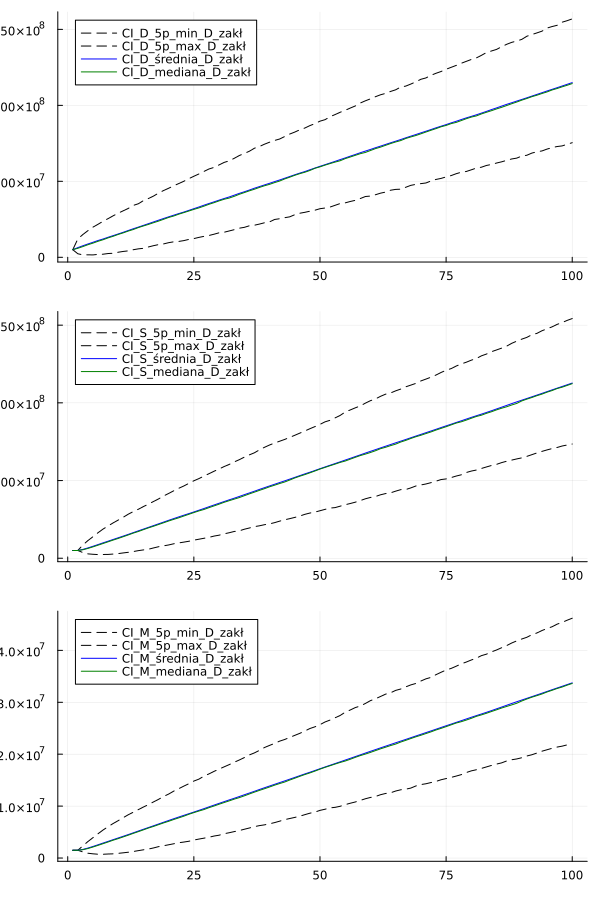

"C:\\Users\\suzda\\Downloads\\plot1.svg"

In [163]:
using Plots
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (3, 1), size = (600, 900)) # Trzy (pod)wykresy pionowo
T=100
# Subplot 1
plot!(p[1], 1:T, CI_D_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_min_D_zakł")
plot!(p[1], 1:T, CI_D_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_max_D_zakł")
plot!(p[1], 1:T, CI_D_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D_średnia_D_zakł")
plot!(p[1], 1:T, CI_D_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D_mediana_D_zakł")
# Subplot 2
plot!(p[2], 1:T, CI_S_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_min_D_zakł")
plot!(p[2], 1:T, CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_max_D_zakł")
plot!(p[2], 1:T, CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_S_średnia_D_zakł")
plot!(p[2], 1:T, CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_S_mediana_D_zakł")
# Subplot 3
plot!(p[3], 1:T, CI_M_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_min_D_zakł")
plot!(p[3], 1:T, CI_M_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_max_D_zakł")
plot!(p[3], 1:T, CI_M_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_M_średnia_D_zakł")
plot!(p[3], 1:T, CI_M_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_M_mediana_D_zakł")
# Display the plot
display(p)
#
savefig(p, "plot1.svg")
#UWAGA, BRZYDKO WYCHODZI - TRZEBA BĘDZIE DOSTOSOWAĆ WYKRES!


### PODPUNKT 2

In [174]:
#Powtórzenia układu - symulacja
size(X_D_zakł[:, :, 1])
size(X_0)
X_D_zakł[:, :, 1] .= transpose(X_0);
for z in 1:Z_D
    for t in 2:T
        if t==2
            X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] + 1000*Wektory_D_zakł[z, :, t]
        else
            X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] 
        end
    end
end

In [175]:
# Confidence intervals and statistics
CI_D_5p_min_D_zakł = zeros(T)
CI_D_5p_max_D_zakł = zeros(T)
CI_S_5p_min_D_zakł = zeros(T)
CI_S_5p_max_D_zakł = zeros(T)
CI_M_5p_min_D_zakł = zeros(T)
CI_M_5p_max_D_zakł = zeros(T)
UPORZADKOWANE_D = zeros(Z_D, T)
UPORZADKOWANE_S = zeros(Z_D, T)
UPORZADKOWANE_M = zeros(Z_D, T)
for t in 1:T
UPORZADKOWANE_D[:, t] = sort(X_D_zakł[:, 1, t])
CI_D_5p_min_D_zakł[t] = UPORZADKOWANE_D[250, t]
CI_D_5p_max_D_zakł[t] = UPORZADKOWANE_D[4750, t]
UPORZADKOWANE_S[:, t] = sort(X_D_zakł[:, 2, t])
CI_S_5p_min_D_zakł[t] = UPORZADKOWANE_S[250, t]
CI_S_5p_max_D_zakł[t] = UPORZADKOWANE_S[4750, t]
UPORZADKOWANE_M[:, t] = sort(X_D_zakł[:, 3, t])
CI_M_5p_min_D_zakł[t] = UPORZADKOWANE_M[250, t]
CI_M_5p_max_D_zakł[t] = UPORZADKOWANE_M[4750, t]
end
CI_D_średnia_D_zakł = zeros(T)
CI_S_średnia_D_zakł = zeros(T)
CI_M_średnia_D_zakł = zeros(T)
CI_D_mediana_D_zakł = zeros(T)
CI_S_mediana_D_zakł = zeros(T)
CI_M_mediana_D_zakł = zeros(T)
CI_D_średnia_D_zakł[:] = mean(X_D_zakł[:, 1, :], dims=1)
CI_S_średnia_D_zakł[:] = mean(X_D_zakł[:, 2, :], dims=1)
CI_M_średnia_D_zakł[:] = mean(X_D_zakł[:, 3, :], dims=1)
CI_D_mediana_D_zakł[:] = median(X_D_zakł[:, 1, :], dims=1)
CI_S_mediana_D_zakł[:] = median(X_D_zakł[:, 2, :], dims=1)
CI_M_mediana_D_zakł[:] = median(X_D_zakł[:, 3, :], dims=1)

1×100 Matrix{Float64}:
 1.5e6  2.3657e6  2.01573e6  1.8833e6  …  1.84723e6  1.84723e6  1.84723e6

In [168]:
#typeof(CI_M_mediana_D_zakł)

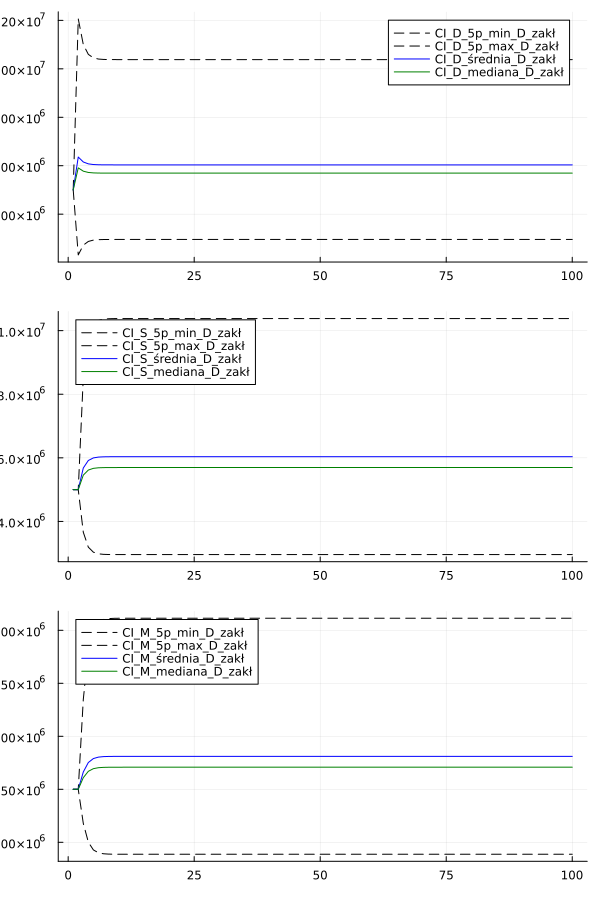

"C:\\Users\\suzda\\Downloads\\plot2.svg"

In [169]:
using Plots
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (3, 1), size = (600, 900)) # Trzy (pod)wykresy pionowo
T=100
# Subplot 1
plot!(p[1], 1:T, CI_D_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_min_D_zakł")
plot!(p[1], 1:T, CI_D_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_max_D_zakł")
plot!(p[1], 1:T, CI_D_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D_średnia_D_zakł")
plot!(p[1], 1:T, CI_D_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D_mediana_D_zakł")
# Subplot 2
plot!(p[2], 1:T, CI_S_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_min_D_zakł")
plot!(p[2], 1:T, CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_max_D_zakł")
plot!(p[2], 1:T, CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_S_średnia_D_zakł")
plot!(p[2], 1:T, CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_S_mediana_D_zakł")
# Subplot 3
plot!(p[3], 1:T, CI_M_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_min_D_zakł")
plot!(p[3], 1:T, CI_M_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_max_D_zakł")
plot!(p[3], 1:T, CI_M_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_M_średnia_D_zakł")
plot!(p[3], 1:T, CI_M_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_M_mediana_D_zakł")
# Display the plot
display(p)
#
savefig(p, "plot2.svg")
#UWAGA, BRZYDKO WYCHODZI - TRZEBA BĘDZIE DOSTOSOWAĆ WYKRES!


In [28]:
CI_M_mediana_D_zakł

100-element Vector{Float64}:
 1.5e6
 1.5e6
 1.6076679472651817e6
 1.8534585818045617e6
 2.134786607237328e6
 2.4551877880121404e6
 2.7659579217584254e6
 3.084021268297525e6
 3.407594975958858e6
 3.7210970291323257e6
 4.064459625138102e6
 4.377040103856286e6
 4.713762015045598e6
 ⋮
 2.96114705923628e7
 2.991571798476558e7
 3.0178837812403932e7
 3.0493678674009252e7
 3.084405234942051e7
 3.1175214287658356e7
 3.154469981701772e7
 3.1867115868877586e7
 3.2221752834325183e7
 3.256386834287818e7
 3.284723214362032e7
 3.32053343005103e7

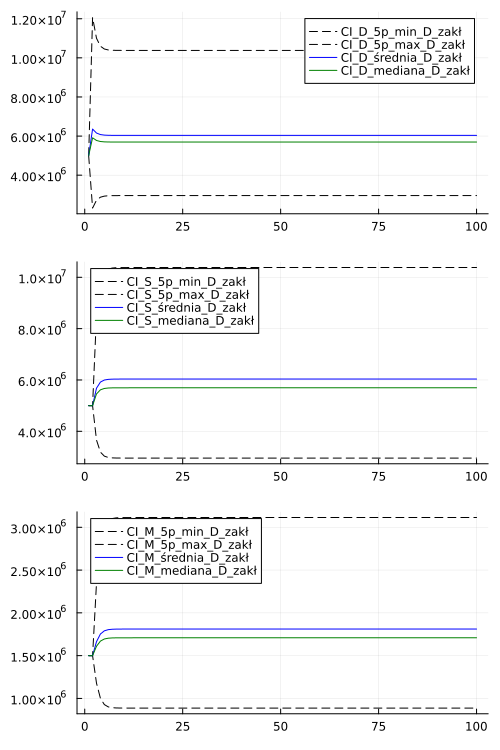

"C:\\Users\\suzda\\Downloads\\plot_rzd2.svg"

In [170]:
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (3, 1), size = (500, 750),left_margin = 6Plots.mm) # POSZERZAMY L
T=100
# Subplot 1
plot!(p[1], 1:T, CI_D_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_min_D_zakł")
plot!(p[1], 1:T, CI_D_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_max_D_zakł")
plot!(p[1], 1:T, CI_D_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D_średnia_D_zakł")
plot!(p[1], 1:T, CI_D_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D_mediana_D_zakł")
# Subplot 2
plot!(p[2], 1:T, CI_S_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_min_D_zakł")
plot!(p[2], 1:T, CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_max_D_zakł")
plot!(p[2], 1:T, CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_S_średnia_D_zakł")
plot!(p[2], 1:T, CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_S_mediana_D_zakł")
# Subplot 3
plot!(p[3], 1:T, CI_M_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_min_D_zakł")
plot!(p[3], 1:T, CI_M_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_max_D_zakł")
plot!(p[3], 1:T, CI_M_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_M_średnia_D_zakł")
plot!(p[3], 1:T, CI_M_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_M_mediana_D_zakł")
# Display the plot
display(p)
#
savefig(p, "plot_rzd2.svg")

### PODPUNKT 3 I 4

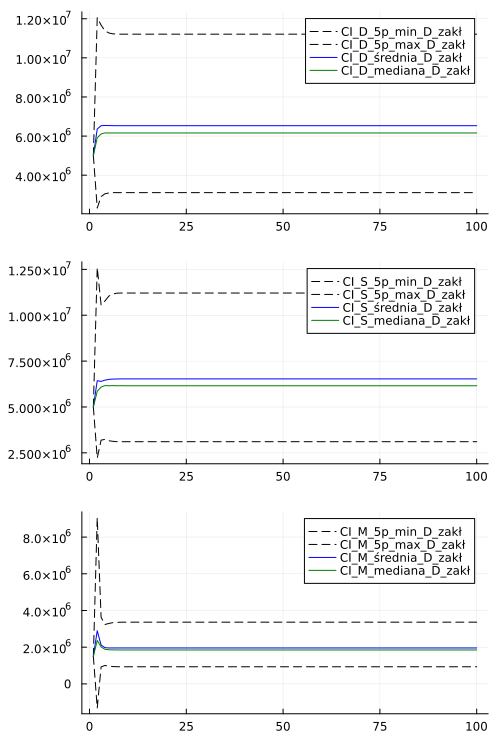

"C:\\Users\\suzda\\Downloads\\plot_rzd2.svg"

In [176]:
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (3, 1), size = (500, 750),left_margin = 6Plots.mm) # POSZERZAMY L
T=100
# Subplot 1
plot!(p[1], 1:T, CI_D_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_min_D_zakł")
plot!(p[1], 1:T, CI_D_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_max_D_zakł")
plot!(p[1], 1:T, CI_D_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D_średnia_D_zakł")
plot!(p[1], 1:T, CI_D_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D_mediana_D_zakł")
# Subplot 2
plot!(p[2], 1:T, CI_S_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_min_D_zakł")
plot!(p[2], 1:T, CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_max_D_zakł")
plot!(p[2], 1:T, CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_S_średnia_D_zakł")
plot!(p[2], 1:T, CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_S_mediana_D_zakł")
# Subplot 3
plot!(p[3], 1:T, CI_M_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_min_D_zakł")
plot!(p[3], 1:T, CI_M_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_max_D_zakł")
plot!(p[3], 1:T, CI_M_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_M_średnia_D_zakł")
plot!(p[3], 1:T, CI_M_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_M_mediana_D_zakł")
# Display the plot
display(p)
#
savefig(p, "plot_rzd2.svg")

### ANALIZA WRAŻLIWOŚCI I

In [13]:
# Definiowanie zakresu zmian dla współczynnika alpha_11
alpha_11_range = 0.7:0.05:1.0

# Struktura do przechowywania wyników
results = Dict()

Dict{Any, Any}()

In [14]:
#SCENARIUSZ 1 (popyt)
for alpha_11 in alpha_11_range
    # Zaktualizuj współczynnik w macierzy A
    A[1, 1] = alpha_11
    # Dostosowanie innych współczynników w macierzy A, aby utrzymać spójność układu
    alpha_13 = (1 - (alpha_11 + alpha_21*alpha_12/(1 - alpha_22)))*S_przez_M
    A = [alpha_11 alpha_12 alpha_13; alpha_21 alpha_22 alpha_23; alpha_31 alpha_32 alpha_33]

    ##### Symulacja dla scenariusza 1  #######
    X_D_zakł[:, :, 1] .= transpose(X_0);
    for z in 1:Z_D
        for t in 2:T
        X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] + 1000*Wektory_D_zakł[z, :, t]
        end
    end
    wyniki_scenariusz_1 = X_D_zakł
    # Oblicz średnie dla scenariusza 1
    mean_D_1 = mean(X_D_zakł[:, 1, end])
    mean_S_1 = mean(X_D_zakł[:, 2, end])
    mean_M_1 = mean(X_D_zakł[:, 3, end])
    
    results[alpha_11] = ((mean_D_1, mean_S_1, mean_M_1))
end


In [15]:
# Przygotowanie danych do wykresu
alpha_11_values = collect(keys(results))
means_D_1 = [value[1] for value in values(results)];
means_S_1 = [value[2] for value in values(results)];
means_M_1 = [value[3] for value in values(results)];


In [17]:
using Plots

Precompiling FileIOExt
  ✓ Plots → FileIOExt
  1 dependency successfully precompiled in 7 seconds. 174 already precompiled.
Precompiling IJuliaExt
  ✓ Plots → IJuliaExt
  1 dependency successfully precompiled in 7 seconds. 182 already precompiled.


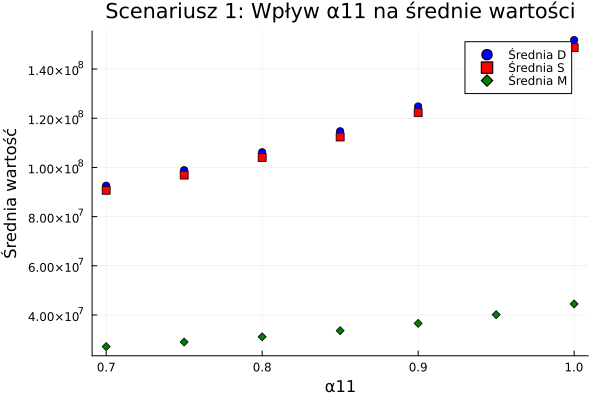

In [18]:
# Wykres punktowy dla scenariusza 1
scatter(alpha_11_values, means_D_1, label="Średnia D", title="Scenariusz 1: Wpływ α11 na średnie wartości", xlabel="α11", ylabel="Średnia wartość", legend=:topright, markercolor=:blue, markershape=:circle, markerstrokecolor=:black)
scatter!(alpha_11_values, means_S_1, label="Średnia S", markercolor=:red, markershape=:square, markerstrokecolor=:black)
scatter!(alpha_11_values, means_M_1, label="Średnia M", markercolor=:green, markershape=:diamond, markerstrokecolor=:black)

In [23]:
#SCENARIUSZ 2 (popyt)
for alpha_11 in alpha_11_range
    # Zaktualizuj współczynnik w macierzy A
    A[1, 1] = alpha_11
    # Dostosowanie innych współczynników w macierzy A, aby utrzymać spójność układu
    alpha_13 = (1 - (alpha_11 + alpha_21*alpha_12/(1 - alpha_22)))*S_przez_M
    A = [alpha_11 alpha_12 alpha_13; alpha_21 alpha_22 alpha_23; alpha_31 alpha_32 alpha_33]

    # Symulacja dla scenariusza 2
    X_D_zakł[:, :, 1] .= transpose(X_0);
    for z in 1:Z_D
        for t in 2:T
            if t==2
                X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] + 1000*Wektory_D_zakł[z, :, t]
            else
                X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] 
            end
        end
    end
    wyniki_scenariusz_2 = X_D_zakł

    # Oblicz średnie dla scenariusza 2
    mean_D_2 = mean(X_D_zakł[:, 1, end])
    mean_S_2 = mean(X_D_zakł[:, 2, end])
    mean_M_2 = mean(X_D_zakł[:, 3, end])
    
    results[alpha_11] = ((mean_D_2, mean_S_2, mean_M_2))
end


In [24]:
means_D_2 = [value[1] for value in values(results)]
means_S_2 = [value[2] for value in values(results)]
means_M_2 = [value[3] for value in values(results)]

7-element Vector{Float64}:
 1.8944399139344434e6
 1.82682164297426e6
 1.8574611720030976e6
 1.7789940854658317e6
 1.8010199343183967e6
 1.9399522116961086e6
 1.7599717614567978e6

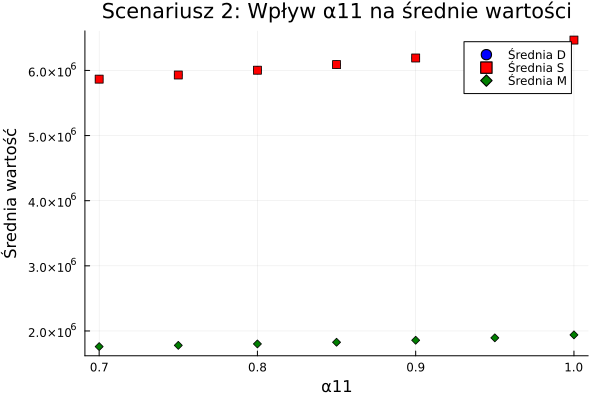

In [25]:
# scenariusz 2 (popyt)
scatter(alpha_11_values, means_D_2, label="Średnia D", title="Scenariusz 2: Wpływ α11 na średnie wartości", xlabel="α11", ylabel="Średnia wartość", legend=:topright, markercolor=:blue, markershape=:circle, markerstrokecolor=:black)
scatter!(alpha_11_values, means_S_2, label="Średnia S", markercolor=:red, markershape=:square, markerstrokecolor=:black)
scatter!(alpha_11_values, means_M_2, label="Średnia M", markercolor=:green, markershape=:diamond, markerstrokecolor=:black)